In [ ]:
pip install wget

In [1]:
import astropy
from astropy.table import Table,vstack, Column
from subprocess import call
import subprocess
from astropy.io import fits
import numpy as np
import wget
import matplotlib.pyplot as plt
from gpz_pype import utilities
from gpz_pype.utilities import Params, set_gpz_path, basic_lupt_soft, flux_to_lupt
import astropy.units as u
from numpy.ma import masked
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky

from os import listdir
from os.path import isfile, join

In [ ]:
#['ceers-full','gdn','primer-uds-south'
fields= ['gds','ngdeep','primer-cosmos-east','primer-cosmos-west','primer-uds-north','abell2744clu','abells1063','elgordo','j112716p4228','macs0647','rxj2129','smacs0723','sunrise']

# Download Field Files


In [ ]:
#for field in fields:
url=f'https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/gdn-grizli-v7.0_phot.fits'
filename=wget.download(url)
#print(f' {field} downloaded')

In [ ]:
hdul= fits.open('MPhys/DAWN_JWST/ceers-full-grizli-v7.0_phot.fits', memmap=True,formats='fits')
t = Table.read(hdul)
t

# Initial Catalogue Making - Run Once


In [ ]:
    Insert
    Cell
    Kernel
    Widgets
    Help

###INITIAL CATALOGUE MAKING
hdu_list = fits.open('ceers-full-grizli-v7.0_phot.fits', memmap=True,formats='fits')
ceers = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('gdn-grizli-v7.0_phot.fits', memmap=True,formats='fits')
gdn= Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('gds-grizli-v7.0_phot.fits', memmap=True,formats='fits')
gds = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('ngdeep-grizli-v7.0_phot.fits', memmap=True,formats='fits')
ngdeep = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-cosmos-east-grizli-v7.0_phot.fits', memmap=True,formats='fits')
cosmos_east = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-cosmos-west-grizli-v7.0_phot.fits', memmap=True,formats='fits')
cosmos_west = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-uds-south-grizli-v7.0_phot.fits', memmap=True,formats='fits')
udss = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('primer-uds-north-grizli-v7.0_phot.fits', memmap=True,formats='fits')
udsn = Table(hdu_list[1].data)
hdu_list.close()

In [ ]:
#ADDING FIELDS TO CATALOGUE - RUN BOTH CELLS IF STARTING FROM SCRATCH
hdu_list = fits.open('abell2744clu-grizli-v7.0_phot.fits', memmap=True,formats='fits')
abell2744 = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('abells1063-grizli-v7.0_phot.fits', memmap=True,formats='fits')
abells1063= Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('elgordo-grizli-v7.0_phot.fits', memmap=True,formats='fits')
elgordo = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('j112716p4228-grizli-v7.0_phot.fits', memmap=True,formats='fits')
j_field = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('macs0647-grizli-v7.0_phot.fits', memmap=True,formats='fits')
macs = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('rxj2129-grizli-v7.0_phot.fits', memmap=True,formats='fits')
rxj = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('smacs0723-grizli-v7.0_phot.fits', memmap=True,formats='fits')
smacs = Table(hdu_list[1].data)
hdu_list.close()

hdu_list = fits.open('sunrise-grizli-v7.0_phot.fits', memmap=True,formats='fits')
sunrise = Table(hdu_list[1].data)
hdu_list.close()

In [ ]:
abell2744.add_column('abells2744clu', name='field', index=0)
abells1063.add_column('abells1063', name='field', index=0)
elgordo.add_column('elgordo', name='field', index=0)
j_field.add_column('j112716p4228', name='field', index=0)
macs.add_column('macs0647', name='field', index=0)
rxj.add_column('rxj2129', name='field', index=0)
smacs.add_column('smacs0723', name='field', index=0)
sunrise.add_column('sunrise', name='field', index=0)

In [ ]:
ceers.add_column('ceers', name='field', index=0)
gdn.add_column('gdn', name='field', index=0)
gds.add_column('gds', name='field', index=0)
ngdeep.add_column('ngdeep', name='field', index=0)
cosmos_east.add_column('cosmos_east', name='field', index=0)
cosmos_west.add_column('cosmos_west', name='field', index=0)
udsn.add_column('udsn', name='field', index=0)
udss.add_column('udss', name='field', index=0)

In [ ]:
main = vstack([ceers,gdn,gds])#,ngdeep,cosmos_east,cosmos_west,udsn,udss])

In [ ]:
m2 = vstack([main,ngdeep,cosmos_east])#,cosmos_west])

In [ ]:
m3 = vstack([m2,udsn,udss])

In [ ]:
m4 = vstack([m3,cosmos_west])

In [ ]:
side = vstack([abell2744,abells1063,elgordo,j_field,macs,rxj,smacs,sunrise])

In [ ]:
m4.write('MPhys/original_jwst_data/main_merged.fits',format='fits',overwrite=True)

In [ ]:
side.write('MPhys/original_jwst_data/other_merged.fits',format='fits',overwrite=True)

In [ ]:
all_merge = vstack([m4,side])

In [ ]:
#all_merge.write('MPhys/original_jwst_data/all_merged_abmag.fits',format='fits',overwrite=True)

In [ ]:
#fields_new= ['ceers','gdn','gds','ngdeep','cosmos_east','cosmos_west','udsn','udss','abell2744','abells1063','elgordo','j_field','macs','rxj','smacs','sunrise']

In [ ]:
jwst_merge = Table.read('MPhys/original_jwst_data/all_merged_ab.fits',format ='fits')

In [ ]:
#jwst_merge.add_column(np.nan,name = 'z_spec',index = 3)
jwst_merge.write('MPhys/original_jwst_data/all_merged_ab.fits',format='fits',overwrite=True)

## CANDELS

In [ ]:
cosmos = Table.read('MPhys/CANDELS/CANDELS.COSMOS.F160W.Processed.photz.fits',format='fits')
egs = Table.read('MPhys/CANDELS/CANDELS.EGS.F160W.Processed.photz.fits',format='fits')
uds_candels = Table.read('MPhys/CANDELS/CANDELS.UDS.F160W.Processed.photz.fits',format='fits')
gds_candels = Table.read('MPhys/CANDELS/CANDELS.GOODSS.F160W.Processed.photz.fits',format='fits')
gdn_candels = Table.read('MPhys/CANDELS/CANDELS.GOODSN.F160W.Processed.photz.fits',format='fits')

In [ ]:
candels = vstack([cosmos,egs,uds_candels,gds_candels,gdn_candels])

In [ ]:
candels.write('MPhys/CANDELS/candels_combined.fits',format='fits')

# Convert to Luptiudes for Each Field


In [ ]:
field=gds


In [ ]:
filters0 = [col.split('_')[0] for col in field.colnames if col.endswith('flux_aper_0')]
filters0=filters0[1:]
filters1 = [col.split('_')[0] for col in field.colnames if col.endswith('flux_aper_1')]
filters1=filters1[1:]

filters2 = [col.split('_')[0] for col in field.colnames if col.endswith('flux_aper_2')]
filters2=filters2[1:]

filters3 = [col.split('_')[0] for col in field.colnames if col.endswith('flux_aper_3')]
filters3=filters3[1:]



In [ ]:

b_arr0 = [basic_lupt_soft(field[f'{filt}_flux_aper_0'], field[f'{filt}_fluxerr_aper_0']) for filt in filters0] 
b_arr1 = [basic_lupt_soft(field[f'{filt}_flux_aper_1'], field[f'{filt}_fluxerr_aper_1']) for filt in filters1] 
b_arr2 = [basic_lupt_soft(field[f'{filt}_flux_aper_2'], field[f'{filt}_fluxerr_aper_2']) for filt in filters2] 
b_arr3 = [basic_lupt_soft(field[f'{filt}_flux_aper_3'], field[f'{filt}_fluxerr_aper_3']) for filt in filters3] 

In [ ]:
i=2
lupt_cols=field['field','id','ra','dec']

for filt,b in zip(filters0,b_arr0):
    lupt,lupterr = flux_to_lupt(field[f'{filt}_flux_aper_0'],field[f'{filt}_fluxerr_aper_0'],b)
    lupt_cols[f'lupt_{filt}_aper0']=lupt
    lupt_cols[f'lupterr_{filt}_aper0']=lupterr
for filt,b in zip(filters1,b_arr1):
    lupt,lupterr = flux_to_lupt(field[f'{filt}_flux_aper_1'],field[f'{filt}_fluxerr_aper_1'],b)
    lupt_cols[f'lupt_{filt}_aper1']=lupt
    lupt_cols[f'lupterr_{filt}_aper1']=lupterr
for filt,b in zip(filters2,b_arr2):
    lupt,lupterr = flux_to_lupt(field[f'{filt}_flux_aper_2'],field[f'{filt}_fluxerr_aper_2'],b)
    lupt_cols[f'lupt_{filt}_aper2']=lupt
    lupt_cols[f'lupterr_{filt}_aper2']=lupterr
for filt,b in zip(filters3,b_arr3):
    lupt,lupterr = flux_to_lupt(field[f'{filt}_flux_aper_3'],field[f'{filt}_fluxerr_aper_3'],b)
    lupt_cols[f'lupt_{filt}_aper3']=lupt
    lupt_cols[f'lupterr_{filt}_aper3']=lupterr

lupt_cols.write(f'MPhys/catalogues/{fields[i]}_lupts.fits',format='fits', overwrite=True)

In [ ]:
t = Table.read('MPhys/catalogues/gds_lupts.fits',format ='fits')
t

In [ ]:
lup_ceers=Table.read('MPhys/catalogues/ceers-full_lupts.fits',format='fits')
lup_gds=Table.read('MPhys/catalogues/gds_lupts.fits',format='fits')
lup_gdn=Table.read('MPhys/catalogues/gdn_lupts.fits',format='fits')
lup_ngdeep=Table.read('MPhys/catalogues/ngdeep_lupts.fits',format='fits')
lup_udss=Table.read('MPhys/catalogues/primer-uds-south_lupts.fits',format='fits')
lup_udsn=Table.read('MPhys/catalogues/primer-uds-north_lupts.fits',format='fits')
lup_cosmos_east=Table.read('MPhys/catalogues/primer-cosmos-east_lupts.fits',format='fits')
lup_cosmos_west=Table.read('MPhys/catalogues/primer-cosmos-west_lupts.fits',format='fits')

In [ ]:
lup_abell2744clu = Table.read('MPhys/catalogues/abell2744clu_lupts.fits',format='fits')
lup_abells1063=Table.read('MPhys/catalogues/abells1063_lupts.fits',format='fits')
lup_elgordo=Table.read('MPhys/catalogues/elgordo_lupts.fits',format='fits')
lup_j112716p4228=Table.read('MPhys/catalogues/j112716p4228_lupts.fits',format='fits')
lup_macs0647=Table.read('MPhys/catalogues/macs0647_lupts.fits',format='fits')
lup_rxj2129=Table.read('MPhys/catalogues/rxj2129_lupts.fits',format='fits')
lup_smacs0723=Table.read('MPhys/catalogues/smacs0723_lupts.fits',format='fits')
lup_sunrise=Table.read('MPhys/catalogues/sunrise_lupts.fits',format='fits')

In [ ]:
#saves laptop dying if split up 
lup_con =vstack([lup_ceers,lup_gds,lup_gdn,lup_ngdeep,lup_udss,lup_udsn,lup_cosmos_east,lup_cosmos_west,lup_abell2744clu])


In [ ]:
#most small fields not in specz confirmed so not included rn 

lup_con_small = vstack([lup_abell2744clu,lup_abells1063,lup_elgordo,lup_j112716p4228,lup_macs0647,lup_rxj2129,lup_smacs0723,lup_sunrise])

In [ ]:
lup_total = vstack([lup_con,lup_con_small])

In [ ]:
#needs to be done in CP Lab 
lup_total.write('luptitudes_all_jwst.fits', format='fits', overwrite=True)

In [2]:
t = Table.read('luptitudes_all_jwst.fits', format='fits')
t.add_column(np.nan, name='z_spec',index =4)


In [3]:
print(len(t))
new_id = np.arange(0,len(t),1)
print(new_id)
t['id']= new_id

530526
[     0      1      2 ... 530523 530524 530525]


In [22]:
t

field,id,ra,dec,z_spec,lupt_f1000w_aper0,lupterr_f1000w_aper0,lupt_f105w_aper0,lupterr_f105w_aper0,lupt_f115w-clear_aper0,lupterr_f115w-clear_aper0,lupt_f125w_aper0,lupterr_f125w_aper0,lupt_f1280w_aper0,lupterr_f1280w_aper0,lupt_f140w_aper0,lupterr_f140w_aper0,lupt_f1500w_aper0,lupterr_f1500w_aper0,lupt_f150w-clear_aper0,lupterr_f150w-clear_aper0,lupt_f160w_aper0,lupterr_f160w_aper0,lupt_f1800w_aper0,lupterr_f1800w_aper0,lupt_f182m-clear_aper0,lupterr_f182m-clear_aper0,lupt_f200w-clear_aper0,lupterr_f200w-clear_aper0,lupt_f2100w_aper0,lupterr_f2100w_aper0,lupt_f210m-clear_aper0,lupterr_f210m-clear_aper0,lupt_f275wu_aper0,lupterr_f275wu_aper0,lupt_f277w-clear_aper0,lupterr_f277w-clear_aper0,lupt_f356w-clear_aper0,lupterr_f356w-clear_aper0,lupt_f410m-clear_aper0,lupterr_f410m-clear_aper0,lupt_f435w_aper0,lupterr_f435w_aper0,lupt_f444w-clear_aper0,lupterr_f444w-clear_aper0,lupt_f560w_aper0,lupterr_f560w_aper0,lupt_f606w_aper0,lupterr_f606w_aper0,lupt_f606wu_aper0,lupterr_f606wu_aper0,lupt_f770w_aper0,lupterr_f770w_aper0,lupt_f814w_aper0,lupterr_f814w_aper0,lupt_f1000w_aper1,lupterr_f1000w_aper1,lupt_f105w_aper1,lupterr_f105w_aper1,lupt_f115w-clear_aper1,lupterr_f115w-clear_aper1,lupt_f125w_aper1,lupterr_f125w_aper1,lupt_f1280w_aper1,lupterr_f1280w_aper1,lupt_f140w_aper1,lupterr_f140w_aper1,lupt_f1500w_aper1,lupterr_f1500w_aper1,lupt_f150w-clear_aper1,lupterr_f150w-clear_aper1,lupt_f160w_aper1,lupterr_f160w_aper1,lupt_f1800w_aper1,lupterr_f1800w_aper1,lupt_f182m-clear_aper1,lupterr_f182m-clear_aper1,lupt_f200w-clear_aper1,lupterr_f200w-clear_aper1,lupt_f2100w_aper1,lupterr_f2100w_aper1,lupt_f210m-clear_aper1,lupterr_f210m-clear_aper1,lupt_f275wu_aper1,lupterr_f275wu_aper1,lupt_f277w-clear_aper1,lupterr_f277w-clear_aper1,lupt_f356w-clear_aper1,lupterr_f356w-clear_aper1,lupt_f410m-clear_aper1,lupterr_f410m-clear_aper1,lupt_f435w_aper1,lupterr_f435w_aper1,lupt_f444w-clear_aper1,lupterr_f444w-clear_aper1,lupt_f560w_aper1,lupterr_f560w_aper1,lupt_f606w_aper1,lupterr_f606w_aper1,lupt_f606wu_aper1,lupterr_f606wu_aper1,lupt_f770w_aper1,lupterr_f770w_aper1,lupt_f814w_aper1,lupterr_f814w_aper1,lupt_f1000w_aper2,lupterr_f1000w_aper2,lupt_f105w_aper2,lupterr_f105w_aper2,lupt_f115w-clear_aper2,lupterr_f115w-clear_aper2,lupt_f125w_aper2,lupterr_f125w_aper2,lupt_f1280w_aper2,lupterr_f1280w_aper2,lupt_f140w_aper2,lupterr_f140w_aper2,lupt_f1500w_aper2,lupterr_f1500w_aper2,lupt_f150w-clear_aper2,lupterr_f150w-clear_aper2,lupt_f160w_aper2,lupterr_f160w_aper2,lupt_f1800w_aper2,lupterr_f1800w_aper2,lupt_f182m-clear_aper2,lupterr_f182m-clear_aper2,lupt_f200w-clear_aper2,lupterr_f200w-clear_aper2,lupt_f2100w_aper2,lupterr_f2100w_aper2,lupt_f210m-clear_aper2,lupterr_f210m-clear_aper2,lupt_f275wu_aper2,lupterr_f275wu_aper2,lupt_f277w-clear_aper2,lupterr_f277w-clear_aper2,lupt_f356w-clear_aper2,lupterr_f356w-clear_aper2,lupt_f410m-clear_aper2,lupterr_f410m-clear_aper2,lupt_f435w_aper2,lupterr_f435w_aper2,lupt_f444w-clear_aper2,lupterr_f444w-clear_aper2,lupt_f560w_aper2,lupterr_f560w_aper2,lupt_f606w_aper2,lupterr_f606w_aper2,lupt_f606wu_aper2,lupterr_f606wu_aper2,lupt_f770w_aper2,lupterr_f770w_aper2,lupt_f814w_aper2,lupterr_f814w_aper2,lupt_f1000w_aper3,lupterr_f1000w_aper3,lupt_f105w_aper3,lupterr_f105w_aper3,lupt_f115w-clear_aper3,lupterr_f115w-clear_aper3,lupt_f125w_aper3,lupterr_f125w_aper3,lupt_f1280w_aper3,lupterr_f1280w_aper3,lupt_f140w_aper3,lupterr_f140w_aper3,lupt_f1500w_aper3,lupterr_f1500w_aper3,lupt_f150w-clear_aper3,lupterr_f150w-clear_aper3,lupt_f160w_aper3,lupterr_f160w_aper3,lupt_f1800w_aper3,lupterr_f1800w_aper3,lupt_f182m-clear_aper3,lupterr_f182m-clear_aper3,lupt_f200w-clear_aper3,lupterr_f200w-clear_aper3,lupt_f2100w_aper3,lupterr_f2100w_aper3,lupt_f210m-clear_aper3,lupterr_f210m-clear_aper3,lupt_f275wu_aper3,lupterr_f275wu_aper3,lupt_f277w-clear_aper3,lupterr_f277w-clear_aper3,lupt_f356w-clear_aper3,lupterr_f356w-clear_aper3,lupt_f410m-clear_aper3,lupterr_f410m-clear_aper3,lupt_f435w_aper3,lupterr_f435w_aper3,lupt_f444w-clear_aper3,lu


# Skymatching Catalogues

In [ ]:
candels=Table.read('MPhys/CANDELS/candels_combined.fits',format='fits')
#jwst=Table.read('MPhys/original_jwst_data/all_merged_ab.fits',format='fits')

dawn = Table.read('csv.csv',format='csv')

In [ ]:
z = dawn['zspec']
z[z < 0] = np.nan
masked=[]
for i in range(len(dawn)):
    masked.append(np.ma.is_masked(z[i]))
masked_inv=np.array(np.invert(masked))
masked_cat =dawn[masked_inv*(np.ma.is_masked(z) == True)] 
nans=[]
for i in range(len(masked_cat)):
    nans.append(np.isnan(masked_cat['zspec'][i]))
nans_inv=np.array(np.invert(nans))
dawn_zreal =masked_cat[nans_inv*(np.isnan(masked_cat['zspec']) == False)] 

In [ ]:
dawn_zreal

In [ ]:
#ra1=dawn_zreal['ra']
#dec1=dawn_zreal['dec']
#ra2=candels['RA']
#dec2=candels['DEC']
ra1=dawn['ra']
dec1=dawn['dec']
ra2=candels['RA']
dec2=candels['DEC']

In [ ]:
dawn_cat = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)#dawn
candels_cat = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)#candels


In [ ]:
max_sep = 0.2 * u.arcsec
idx, d2d, d3d = dawn_cat.match_to_catalog_sky(candels_cat)#catalog = candels information
idx_dawn, d2d_dawn, d3d_dawn = candels_cat.match_to_catalog_sky(dawn_cat)

In [ ]:
id_candel=[] #ids of candels catalog 
for i in range(len(ra1)):
    if d2d[i]< max_sep:
        id_candel.append(idx[i])
id_dawn=[] #ids of jwst catalog 
for i in range(len(ra2)):
    if d2d_dawn[i]< max_sep:
        id_dawn.append(idx_dawn[i])


In [ ]:
id_candels_new=list(set(id_candel))
id_dawn_new = list(set(id_dawn)) 
matched_candels = candels[id_candels_new]
matched_dawn= dawn[id_dawn_new ]

In [ ]:
#candels.remove_rows(id_candel)
dawn.remove_rows(id_dawn)
candels

In [ ]:
matched_candels['z_spec']=matched_dawn['zspec'] #update candels zspec to jwst zspec

In [ ]:
#dawn_zreal.rename_column('ra', 'RA')
#dawn_zreal.rename_column('dec', 'DEC')
#dawn_zreal.rename_column('zspec','z_spec')

In [ ]:
matched_candels

In [ ]:
zspec_cat = vstack([candels,matched_candels, dawn_zreal])
specz_conf = zspec_cat['RA','DEC','z_spec']
specz_conf.write('MPhys/catalogues/full_specz_sources.fits',format='fits')

In [ ]:
specz = Table.read('MPhys/catalogues/full_specz_sources.fits',format='fits')

In [ ]:
ra3 = jwst['ra']
dec3=jwst['dec']
ra4=specz['RA']
dec4=specz['DEC']

jwst_cat = SkyCoord(ra=ra3*u.degree, dec=dec3*u.degree)#jwst
specz_cat = SkyCoord(ra=ra4*u.degree, dec=dec4*u.degree)#jwst

In [ ]:
idx_specz, d2d_specz, d3d_specz = jwst_cat.match_to_catalog_sky(specz_cat)#catalog = candels information
idx_jwst, d2d_jwst, d3d_jwst = specz_cat.match_to_catalog_sky(jwst_cat)

In [ ]:
id_specz=[] #ids of candels catalog 
for i in range(len(ra3)):
    if d2d_specz[i]< max_sep:
        id_specz.append(idx_specz[i])
id_jwst=[] #ids of jwst catalog 
for i in range(len(ra4)):
    if d2d_jwst[i]< max_sep:
        id_jwst.append(idx_jwst[i])


In [ ]:
idx_new = list(set(id_specz)) #list of non-repeating candels indexs
idx_new_jwst = list(set(id_jwst)) 
matched_specz = specz[idx_new]
matched_jwst = jwst[idx_new_jwst]
matched_specz.sort('RA') #makes them in same order
matched_jwst.sort('ra')


In [ ]:
#matched_jwst.add_column(matched_specz['z_spec'], name='z_spec', index=-1)
matched_jwst.write('MPhys/catalogues/jwst_skymatched_specz.fits',format='fits')

# Skymatching for GMM+CSL Catalogue Making 

### JWST match to CANDELS

In [4]:
candels=Table.read('MPhys/CANDELS/candels_combined.fits',format='fits')
#jwst_merge=Table.read('MPhys/original_jwst_data/all_merged_ab.fits',format = 'fits')



In [5]:
jwst_merge=t

In [6]:
#matching jwst and candels
ra1=jwst_merge['ra']

dec1=jwst_merge['dec']
ra2=candels['RA']
dec2=candels['DEC']
print(len(ra2))

186435


In [7]:
jwst_cat = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)#dawn
candels_cat = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)#candels


In [8]:
max_sep = 0.1 * u.arcsec
idx, d2d, d3d = jwst_cat.match_to_catalog_sky(candels_cat)#catalog = candels information
idx_jwst, d2d_jwst, d3d_jwst = candels_cat.match_to_catalog_sky(jwst_cat)
#idx, d2d, d3d = jwst_cat.match_to_catalog_sky(candels_cat)
print(len(idx_jwst))

186435


In [9]:
c_index=[]
j_index=[]
for i in range(len(candels)):
    if abs(ra2[i]-ra1[idx_jwst[i]])<0.1:
        c_index.append(i)
        j_index.append(idx_jwst[i])
        jwst_merge['z_spec'][idx_jwst[i]]=candels['z_spec'][i]


### JWST match to DAWN

In [10]:
dawn = Table.read('csv.csv',format='csv')
ra3 = jwst_merge['ra']
dec3=jwst_merge['dec']
ra4=dawn['ra']
dec4=dawn['dec']
j_merge_cat = SkyCoord(ra=ra4*u.degree, dec=dec4*u.degree)
dawn_cat = SkyCoord(ra=ra4*u.degree, dec=dec4*u.degree)

In [11]:
idx_all, d2d_all, d3d_all = dawn_cat.match_to_catalog_sky(j_merge_cat)

In [12]:
c_index=[]
j_index=[]
for i in range(len(dawn)):
    if abs(ra4[i]-ra3[idx_all[i]])<0.1:
       # c_index.append(i)
       # j_index.append(idx_jwst[i])
        jwst_merge['z_spec'][idx_all[i]]=dawn['zspec'][i]


/home/s1841940/.local/lib/python3.8/site-packages/astropy/table/column.py:1365: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value


In [13]:
jwst_merge['z_spec'][jwst_merge['z_spec']<=0]=np.ma.masked

In [188]:
r=[]
p=0
for i in range(len(jwst_merge)):
    if np.isnan(jwst_merge['z_spec'][i]):
        p+=1
    else:
        r.append(jwst_merge['z_spec'][i])
print(np.max(r))

11.44


In [ ]:
jwst_merge.write('MPhys/original_jwst_data/final_skymatched_catalogue.fits',format = 'fits',overwrite=True)

# Filter Choices for Training Catalogue


In [14]:
#train = Table.read('MPhys/catalogues/lupt_jwst_skymatched_specz.fits',format = 'fits')
#train = Table.read('MPhys/original_jwst_data/final_skymatched_abmag_catalogue.fits',format = 'fits')
train = jwst_merge

In [5]:
#train['z_spec'][train['z_spec']<0]=np.ma.masked


In [150]:
#Full catalogue filter names 
filters_1 = [col.split('_')[1] for col in train.colnames if col.endswith('_aper1')]
#print(len(filters_1))
print(filters_1)

['f1000w', 'f1000w', 'f105w', 'f105w', 'f115w-clear', 'f115w-clear', 'f125w', 'f125w', 'f1280w', 'f1280w', 'f140w', 'f140w', 'f1500w', 'f1500w', 'f150w-clear', 'f150w-clear', 'f160w', 'f160w', 'f1800w', 'f1800w', 'f182m-clear', 'f182m-clear', 'f200w-clear', 'f200w-clear', 'f2100w', 'f2100w', 'f210m-clear', 'f210m-clear', 'f275wu', 'f275wu', 'f277w-clear', 'f277w-clear', 'f356w-clear', 'f356w-clear', 'f410m-clear', 'f410m-clear', 'f435w', 'f435w', 'f444w-clear', 'f444w-clear', 'f560w', 'f560w', 'f606w', 'f606w', 'f606wu', 'f606wu', 'f770w', 'f770w', 'f814w', 'f814w', 'clearp-f430m', 'clearp-f430m', 'clearp-f480m', 'clearp-f480m', 'f090w-clear', 'f090w-clear', 'f110w', 'f110w', 'f115wn-clear', 'f115wn-clear', 'f150wn-clear', 'f150wn-clear', 'f200wn-clear', 'f200wn-clear', 'f335m-clear', 'f335m-clear', 'f350lpu', 'f350lpu', 'f430m-clear', 'f430m-clear', 'f460m-clear', 'f460m-clear', 'f475w', 'f475w', 'f480m-clear', 'f480m-clear', 'f775w', 'f775w', 'f814wu', 'f814wu', 'f850lp', 'f850lp', '

In [28]:
#### FILTER CHOICES
bc= ['f115w-clear','f200w-clear','f356w-clear','f444w-clear']
#swap f115w for f814w,f606w,f435w,f125w,f140w,f160w,f150w
c1 =['f814w','f200w-clear','f356w-clear','f444w-clear']
c2 =['f606w','f200w-clear','f356w-clear','f444w-clear']
c3 =['f435w','f200w-clear','f356w-clear','f444w-clear']
c4 =['f125w','f200w-clear','f356w-clear','f444w-clear']
c5 =['f140w','f200w-clear','f356w-clear','f444w-clear']
c6 =['f160w','f200w-clear','f356w-clear','f444w-clear']
c7 =['f150w-clear','f200w-clear','f356w-clear','f444w-clear']

#swap f444w for f410m
c9= ['f115w-clear','f200w-clear','f356w-clear','f410m-clear']
c10=['f115w-clear','f606w','f150w-clear','f444w-clear']
bc_extra = ['f090w-clear','f115w-clear','f200w-clear','f356w-clear','f444w-clear']
swap= ['bc','f814w','f606w','f435w','f125w','f140w','f160w','f150w-clear','f410m-clear','ic','f090w_inc']
#num = 0

In [26]:
######change this to make new catalogue of filters
aper=1
#aper_size=1

choice=bc
num = 0

print(swap[num])
lup_train = train['field','id','ra','dec','z_spec']
lup_train[f'lupt_{choice[0]}']=train[f'lupt_{choice[0]}_aper{aper}']
lup_train[f'lupterr_{choice[0]}']=train[f'lupterr_{choice[0]}_aper{aper}']
lup_train[f'lupt_{choice[1]}']=train[f'lupt_{choice[1]}_aper{aper}']
lup_train[f'lupterr_{choice[1]}']=train[f'lupterr_{choice[1]}_aper{aper}']
lup_train[f'lupt_{choice[2]}']=train[f'lupt_{choice[2]}_aper{aper}']
lup_train[f'lupterr_{choice[2]}']=train[f'lupterr_{choice[2]}_aper{aper}']
lup_train[f'lupt_{choice[3]}']=train[f'lupt_{choice[3]}_aper{aper}']
lup_train[f'lupterr_{choice[3]}']=train[f'lupterr_{choice[3]}_aper{aper}']
#lup_train[f'lupt_{choice[4]}']=train[f'lupt_{choice[4]}_aper{aper}']
#lup_train[f'lupterr_{choice[4]}']=train[f'lupterr_{choice[4]}_aper{aper}']
#Adds size column 
#lup_train[f'lupt_{choice[3]}_size']=train[f'lupt_{choice[3]}_aper{aper_size}']/train[f'lupt_{choice[3]}_aper{aper}']
#lup_train[f'lupterr_{choice[3]}_size']=train[f'lupterr_{choice[3]}_aper{aper_size}']/train[f'lupterr_{choice[3]}_aper{aper}']

bc


NameError: name 'train' is not defined

In [224]:
f1=[]
for i in range(len(lup_train)):
    f1.append(np.ma.is_masked(lup_train[f'lupt_{choice[0]}'][i]))
f1_inv=np.array(np.invert(f1))
f1_cat =lup_train[f1_inv*(np.ma.is_masked(lup_train[f'lupt_{choice[0]}']) == True)] 

In [225]:

f2=[]
for i in range(len(f1_cat)):
    f2.append(np.ma.is_masked(f1_cat[f'lupt_{choice[1]}'][i]))
f2_inv=np.array(np.invert(f2))
f2_cat =f1_cat[f2_inv*(np.ma.is_masked(f1_cat[f'lupt_{choice[1]}']) ==True)] 

KeyboardInterrupt: 

In [ ]:

f3=[]
for i in range(len(f2_cat)):
    f3.append(np.ma.is_masked(f2_cat[f'lupt_{choice[2]}'][i]))
f3_inv=np.array(np.invert(f3))
f3_cat =f2_cat[f3_inv*(np.ma.is_masked(f2_cat[f'lupt_{choice[2]}']) == True)] 

In [ ]:

f4=[]
for i in range(len(f3_cat)):
    f4.append(np.ma.is_masked(f3_cat[f'lupt_{choice[3]}'][i]))
f4_inv=np.array(np.invert(f4))
f4_cat =f3_cat[f4_inv*(np.ma.is_masked(f3_cat[f'lupt_{choice[3]}']) == True)] #false idk why but works 


In [ ]:
len(f4_cat)


In [206]:
#USE IF USING 5TH FILTER
f5=[]
for i in range(len(f4_cat)):
    f5.append(np.ma.is_masked(f4_cat[f'lupt_{choice[4]}'][i]))
f5_inv=np.array(np.invert(f5))
f5_cat =f4_cat[f5_inv*(np.ma.is_masked(f4_cat[f'lupterr_{choice[4]}']) ==True)] 

In [207]:
f5_cat

field,id,ra,dec,z_spec,lupt_f090w-clear,lupterr_f090w-clear,lupt_f115w-clear,lupterr_f115w-clear,lupt_f200w-clear,lupterr_f200w-clear,lupt_f356w-clear,lupterr_f356w-clear,lupt_f444w-clear,lupterr_f444w-clear
bytes13,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
gds,84442,53.15312069395635,-27.838176619557473,nan,28.612175640219032,0.2740563517380495,28.955336994740783,0.2541191639307682,28.79300111207098,0.20977400294945572,28.353119983415915,0.2077802158545767,28.732885898421937,0.27739644366943716
gds,84497,53.15289046837419,-27.837962940589613,nan,29.37486723005038,0.36555056062776314,29.20133084676431,0.22129053601786838,28.66546360657941,0.1341152749638822,29.20896013934385,0.2285537834515071,29.253423374867328,0.3326005913373959
gds,84575,53.15347458317748,-27.837668623936302,nan,31.64451314530344,0.8494922502249955,32.23971437036588,0.5996287757200772,29.72458767966508,0.36546820612283487,29.67425716358448,0.19547558305926696,29.86648266233793,0.3232244108284005
gds,84577,53.15386257673715,-27.837670340874553,nan,32.82892570664863,1.4275567550112025,31.895089910168817,1.6319610449905384,29.322752498840554,1.611865596755323,28.77578482893785,0.08840346025561312,28.62911633573584,0.11600543747643308
gds,84670,53.15149276335404,-27.83742668764051,nan,29.39296643552126,0.46682217768207207,29.149674154163687,0.26313118344013003,27.672377675478504,0.06574206645170373,27.598743141150113,0.1937196867600376,27.728986228847532,0.13451501487082337
gds,84725,53.15301942075186,-27.83775628902553,0.5339,24.91050868591555,0.006404395334493787,24.73429056531034,0.004676804186425011,24.530776151626515,0.004072246901030708,25.01185123675668,0.005154757565680513,25.381556880385755,0.008269700452996393
gds,84726,53.15314977966602,-27.83738143341791,0.0,27.2111200756424,0.04519461196303408,26.985009222214124,0.025845578887532254,25.70894302471603,0.009012655307659757,25.805387910815007,0.008347199371830523,25.75854132382422,0.010011888195632496
gds,84736,53.15241287527497,-27.837312051327448,nan,28.874696763131578,0.20188934270042702,28.73768074392995,0.12025137531004831,28.258733086016797,0.07623110695728895,27.99628403949516,0.04536571579235782,28.150719716037774,0.07604536373074855
gds,84737,53.15257421226139,-27.837291600032096,0.0,26.931042514897783,0.03373483897206528,26.36188938164233,0.015375059386950097,26.016987108418213,0.011390005354670723,26.07302104217229,0.009674997704992168,26.111820101520667,0.013116002129996885


In [208]:
f4_cat.write(f'MPhys/gmm_files/{swap[num]}_luptitude_full_catalogue.fits',format='fits',overwrite=True)
#f5_cat.write(f'MPhys/base_filter_permutations/base_filter_permutations/size/informed_choice_size.cat',format = 'ascii.commented_header',overwrite=True)

In [209]:
f5_cat['z_spec'][f5_cat['z_spec']==0]=np.nan

In [210]:
#MAKE THE TRAINING CATALOGUE
#USE IF USING 5TH FILTER
training=[]
for i in range(len(f5_cat)):
    training.append(np.isnan(f5_cat['z_spec'][i]))
training_inv=np.array(np.invert(training))
training_cat =f5_cat[training_inv*(np.isnan(f5_cat['z_spec']) == False)] 

In [211]:
training_cat

field,id,ra,dec,z_spec,lupt_f090w-clear,lupterr_f090w-clear,lupt_f115w-clear,lupterr_f115w-clear,lupt_f200w-clear,lupterr_f200w-clear,lupt_f356w-clear,lupterr_f356w-clear,lupt_f444w-clear,lupterr_f444w-clear
bytes13,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
gds,84725,53.15301942075186,-27.83775628902553,0.5339,24.91050868591555,0.006404395334493787,24.73429056531034,0.004676804186425011,24.530776151626515,0.004072246901030708,25.01185123675668,0.005154757565680513,25.381556880385755,0.008269700452996393
gds,84744,53.153991711952344,-27.837274309050876,1.1394,25.41308877541038,0.016138011174590072,25.139831224739318,0.00936399993006501,25.23977879461196,0.010596798597185472,25.233086086984343,0.005518340182648722,25.382431187510758,0.007407168907608066
gds,84977,53.15389042457367,-27.836643209982824,0.6885,25.208488267816715,0.008658340660559592,25.078414070398104,0.006220397393249812,24.9783384163022,0.005747721056549976,25.27513339402176,0.005810394340221271,25.68865792410201,0.009234717807439096
gds,85072,53.15450603869377,-27.836557483758842,2.027,26.120012508617982,0.03451728861077329,25.521578215407796,0.01438220062642559,25.012041723832656,0.009885089402746133,24.919314247755416,0.004627886636087988,24.888390662813556,0.00529955792727953
gds,85628,53.14627357416206,-27.83460668288939,5.1629,27.140842730853688,0.04553023623342922,26.909747412097893,0.02639729083575395,26.70359636133943,0.0215940973317694,26.931545839136984,0.025949317001213345,26.217300880234372,0.019464483496084293
gds,85640,53.14859111280495,-27.834988357410623,0.0377,25.436756684118507,0.00955892578640426,25.33867084161439,0.0070550838714465314,25.53270043785423,0.007936226340446806,26.554605796704255,0.01377767941190054,26.952983198825635,0.0263457451662863
gds,85903,53.15021655422448,-27.834594996128725,1.612,24.101255796547424,0.0035746003537348195,22.607435583125444,0.0014040130286821998,21.809334802196037,0.0009487945507877301,21.404068187330093,0.0007751849305806351,21.315128571524202,0.0007507341220355967
gds,85922,53.15218689808116,-27.835171241305126,0.9891,23.574840895612738,0.002561098323294711,23.12330134380971,0.0018280459102243763,22.502432693516496,0.0013285554911403586,22.48341357307042,0.0012907407104712787,22.85495803203944,0.0015963398009391132
gds,85924,53.15250869248979,-27.834380266470944,0.719,23.9867993014355,0.0034108123390193027,23.55521697594587,0.002306300675889817,22.993425724132667,0.0017008800662767093,22.97658705703089,0.001642067791576103,23.359214088505286,0.002100778155888657


In [212]:
training_cat.write(f'MPhys/gpz_catalogues/{swap[num]}_full_training_cat.cat',format='ascii.commented_header',overwrite=True)

In [2]:
#REGULAR


t_full =Table.read(f'MPhys/gpz_catalogues/bc_full_training_cat.cat',format = 'ascii.commented_header')
#t_full = training_cat
train_sample = int(len(t_full)*0.8)
t = t_full[0:train_sample]
p = t_full[train_sample:-1]
#t.write(f'MPhys/gpz_catalogues/reg/TRAIN/train_{swap[num]}.cat',format = 'ascii.commented_header',overwrite=True)
#p.write(f'MPhys/gpz_catalogues/reg/PRED/pred_{swap[num]}.cat',format = 'ascii.commented_header',overwrite=True)

# Split into high and low redshift


In [3]:
from numpy import random as np_random

In [89]:

#t_full =Table.read('MPhys/gmm_files/bc_training_cat.cat',format = 'ascii.commented_header')
t_full.sort('z_spec')
z= t_full['z_spec']

#print(z)


In [62]:
bins = np.linspace(np.min(z),np.max(z),7)
print(bins[6])

11.44


In [92]:

bins = np.linspace(np.min(z),np.max(z),5)
bin1=[]
bin2=[]
bin3=[]
bin4=[]
bin5=[]
bin6=[]
for i in range(len(z)):
    if bins[0]<=z[i]<=bins[1]:
        bin1.append(i)
    elif bins[1]<=z[i]<=bins[2]:
        bin2.append(i)
    elif bins[2]<=z[i]<=bins[3]:
        bin3.append(i)
    elif bins[3]<=z[i]<=bins[4]:
        bin4.append(i)
    #elif bins[4]<=z[i]<=bins[5]:
    #    bin5.append(z[i])
    ##elif bins[5]<=z[i]<=bins[6]:
    #    bin6.append(z[i])
print(bin4)

[12034, 12035, 12036, 12037]


In [95]:
low = t_full[bin1]
h2= t_full[bin2]
h3= t_full[bin3]
h4= t_full[bin4]

In [98]:
low_lim = int(len(low)*0.8)
np_random.permutation(low)
t_low = low[0:low_lim]
p_low = low[low_lim:-1]
t_low.write(f'MPhys/gpz_catalogues/reg_z_split/lowz/TRAIN/train_lowz_bc_test.cat',format = 'ascii.commented_header',overwrite=True)
p_low.write(f'MPhys/gpz_catalogues/reg_z_split/lowz/PRED/train_lowz_bc_test.cat',format = 'ascii.commented_header',overwrite=True)

In [119]:
h2_lim = int(len(h2)*0.8)
np_random.permutation(h2)
t_h2 = h2[0:h2_lim]
p_h2 = h2[h2_lim:len(h2)]

h3_lim = int(len(h3)*0.8)
np_random.permutation(h3)
t_h3 = h3[0:h3_lim]
p_h3 = h3[h3_lim:len(h3)]

h4_lim = int(len(h4)*0.8)
np_random.permutation(h4)
t_h4 = h4[0:h4_lim]
p_h4 = h4[h4_lim:len(h4)]

t_high = vstack([t_h2,t_h3,t_h4])
p_high = vstack([p_h2,p_h3,p_h4])

t_high.write(f'MPhys/gpz_catalogues/reg_z_split/highz/TRAIN/train_highz_bc_test.cat',format = 'ascii.commented_header',overwrite=True)
p_high.write(f'MPhys/gpz_catalogues/reg_z_split/highz/PRED/pred_highz_bc_test.cat',format = 'ascii.commented_header',overwrite=True)
#highz

In [117]:
p_high

field,id,ra,dec,z_spec,lupt_f115w-clear,lupterr_f115w-clear,lupt_f200w-clear,lupterr_f200w-clear,lupt_f356w-clear,lupterr_f356w-clear,lupt_f444w-clear,lupterr_f444w-clear
str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cosmos_west,435259,150.10810461393186,2.411128874435633,4.5128,24.75640010158339,0.014930325060666338,24.507630506149923,0.008312181119043313,24.30474295510995,0.004678392817871511,24.254967119220446,0.005974239289478581
cosmos_west,435270,150.08905681614095,2.4111741090093814,4.5139,24.19974745796653,0.012082665345950061,23.707773757585528,0.005364950624090088,23.72567000771922,0.004972081039961968,23.737092733808183,0.007275990756997513
cosmos_west,435286,150.11033351596168,2.4113523743755603,4.514,24.799072513452515,0.012494553312942396,24.556646234755398,0.008418386626750908,25.494037558734437,0.011493829147206655,25.85787459390799,0.025327530489643313
cosmos_west,435335,150.10359849381462,2.4117326114196187,4.52,25.26328810559153,0.023528481403721397,24.458956648436395,0.007919969889610976,24.32047047594385,0.005146497924167178,24.26873411974946,0.006660634304548352
cosmos_west,435334,150.10325702275762,2.411516538015043,4.52,24.652145903287774,0.01360538200388024,24.333397575418132,0.007223724006862441,24.2891116502421,0.00491972161520817,24.56529843327038,0.008375250312180196
cosmos_west,435364,150.1183473622051,2.411851202377988,4.5202,25.656797985778315,0.03583181259741208,25.453547053622156,0.030908084224975187,25.603939478993134,0.0166585470854016,26.05411917190613,0.049450471391856696
cosmos_west,435400,150.0812399435542,2.412261265396384,4.5221,24.624128657476188,0.022167141016679034,24.455102714819365,0.01315338205524624,25.408387327269015,0.02211648745323173,25.75878476501234,0.04926726303705102
cosmos_west,435401,150.07270927346076,2.411252979268262,4.529,23.591064240641785,0.008797628983729256,23.59795976444922,0.006303923587583123,24.423766910727583,0.009163689511394636,24.740883535826267,0.01882481895547938
cosmos_west,435412,150.0909582674333,2.4123338520061153,4.5293,25.12574588723717,0.02606546856090646,24.658791688958882,0.011975904987327621,24.79181715949873,0.008585642838349793,24.80815473668609,0.01260850302066955


In [35]:

#highz.write(f'MPhys/base_filter_permutations/base_filter_permutations/zsplit/highz_base_choice.cat', format = 'ascii.commented_header')
#lowz.write(f'MPhys/base_filter_permutations/base_filter_permutations/zsplit/lowz_base_choice.cat', format =  'ascii.commented_header')

#HIGH
train_sample_high = int(len(highz)*0.8)


t_high = highz[0:train_sample_high]

p_high = highz[train_sample_high:-1]
t_high.write(f'MPhys/gpz_catalogues/reg_z_split/highz/TRAIN/train_highz_{swap[num]}_no_perm.cat',format = 'ascii.commented_header',overwrite=True)
p_high.write(f'MPhys/gpz_catalogues/reg_z_split/highz/PRED/pred_highz_{swap[num]}_no_perm.cat',format = 'ascii.commented_header',overwrite=True)

#LOW
#low_full =Table.read('MPhys/base_filter_permutations/base_filter_permutations/zsplit/lowz_base_choice.cat',format = 'ascii.commented_header')
train_sample_low = int(len(lowz)*0.8)
t_low = lowz[0:train_sample_low]
p_low = lowz[train_sample_low:-1]
t_low.write(f'MPhys/gpz_catalogues/reg_z_split/lowz/TRAIN/train_lowz_{swap[num]}_no_perm.cat',format = 'ascii.commented_header',overwrite=True)
p_low.write(f'MPhys/gpz_catalogues/reg_z_split/lowz/PRED/pred_lowz_{swap[num]}_no_perm.cat',format = 'ascii.commented_header',overwrite=True)
highz

field,id,ra,dec,z_spec,lupt_f115w-clear,lupterr_f115w-clear,lupt_f200w-clear,lupterr_f200w-clear,lupt_f356w-clear,lupterr_f356w-clear,lupt_f444w-clear,lupterr_f444w-clear
str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ceers,747,215.03282004463466,52.86871328699893,11.44,27.812221722260862,0.10906428838526847,27.59686072640545,0.05740026163055145,27.649371635070633,0.045167982929613854,27.813657102912337,0.08103168735108594
ceers,752,215.03497835161798,52.87033071817733,7.925,27.479461971221358,0.0670707023695105,27.058105187108474,0.035408746869323424,27.615031909617446,0.044095002081602296,27.63966364698064,0.06988247210449088
ceers,756,215.0293207773088,52.866346134392025,5.736,30.343276761983862,0.46018626184335515,28.861700039869756,0.1684123219805679,29.60913217155395,0.3103202411514569,29.03530048313842,0.29890654438998593
ceers,764,215.06641471288282,52.89292987575567,8.715,26.68935270487809,0.034333149515812275,26.518336736945535,0.022787301077008104,26.748392332070242,0.02141568961626523,27.145783917868584,0.04632835059558383
ceers,765,215.0309350695175,52.86716029975772,5.033,27.240570497182233,0.05400692259806774,27.336786530308412,0.055143398915362574,27.509811484788045,0.0489708349020034,27.440909172002034,0.058596494175204863
ceers,766,215.03097594114888,52.86727642722956,5.036,26.529462482822733,0.029325691056644985,26.53526455618279,0.028487760941918218,26.82257058567948,0.026853282703450998,26.9861094227204,0.03900138497520511
ceers,768,215.03097046779803,52.867570376017454,4.888,28.995635076877804,0.31320587375245607,28.79267264628926,0.19590171504106704,28.81334376432643,0.15381665465022928,28.750961698454034,0.1781832031018616
ceers,772,215.06005738312484,52.88838053307308,4.61,27.311681028035316,0.06000853747978702,26.9018207916046,0.038474670672074336,26.897250594032936,0.02886109536457596,27.09683012200814,0.05179494732158073
ceers,773,215.06355675473594,52.890929921342966,4.642,28.306036930053892,0.14537783610073732,27.303026379508477,0.048213549608230294,27.738756511691772,0.05426618018151659,27.788536213848555,0.10059486554880138


In [11]:
for i in range(len(t_high['z_spec'])):
    if t_high['z_spec'][i]>np.max(p_high['z_spec']):
        print(i,t_high['z_spec'][i])
print(np.min(t_high['z_spec']))

312 11.44
582 9.696
3.0008


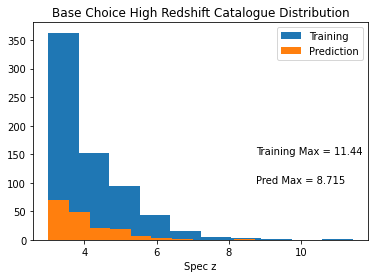

In [15]:
tmax = np.max(t_high['z_spec'])
pmax = np.max(p_high['z_spec'])
plt.hist(t_high['z_spec'],label = 'Training')
plt.hist(p_high['z_spec'],label ='Prediction')
plt.text(8.75,150,f'Training Max = {tmax}')
plt.text(8.75,100,f'Pred Max = {pmax}')
plt.xlabel('Spec z')
plt.legend()
plt.title('Base Choice High Redshift Catalogue Distribution')
plt.savefig('MPhys/gpz_catalogues/reg_z_split/highz/z_distribution_train_pred.png')

In [31]:
tst = Table.read(f'MPhys/gpz_catalogues/reg_z_split/highz/PRED/pred_highz_bc.cat',format = 'ascii.commented_header')
print(np.max(tst['z_spec']))

11.44


In [32]:
tstt = Table.read(f'MPhys/gpz_catalogues/reg_z_split/highz/TRAIN/train_highz_bc.cat',format = 'ascii.commented_header')
print(np.max(tstt['z_spec']))

9.696


In [33]:
print(len(t_high),len(p_high))

680 170
